# Análisis exploratorio

1. Relación entre Euribor y Precio de Venta:
   - Se realizó una matriz de correlación para analizar la relación entre las variables del precio del m2 y el valor del Euribor.
   - La correlación entre estas variables es moderada, con un valor de aproximadamente 0.39.

2. Evolución Temporal de las Variables:
   - Se presentó una gráfica en 3D que muestra las relaciones entre el Euribor y el precio del m2 a lo largo del tiempo.
   - Se crearon dos gráficos separados para visualizar la evolución temporal del precio del m2 y el valor del Euribor cada tres años.
   - Podemos observar como normalmente cuando el precio de venta esta al alza también lo acompaña el valor del euribor excepto en el rango de los años 2014 a 2021, rango de años en el cual se produce una correlación significativamente ionversa entre ambos parámetros (0.77).

3. Correlación entre Seguridad y Calidad de Vida:
   - Se realizó un gráfico de dispersión y una línea de regresión para analizar la correlación entre la seguridad y la calidad de vida.
   - La correlación entre estas variables se obtuvo una correlación alta de 0.82 que muestra como en los distritos con mejor cdv tienen también obtienen mayores puntuaciones en indices de seguridad.

4. Evolución de Variables Demográficas:
   - Se crearon gráficos para visualizar la evolución temporal de variables como el paro, calidad de vida, seguridad y zonas verdes para cada distrito.
   - Los datos se normalizaron para una mejor visualización de la evolución a lo largo del tiempo.
   - Se observan los resultados obtenidos tanto en el análisis previo con SQL como en la posterior clusterización. Además de un evolutivo de las variables seleccionadas.

5. Análisis de Evolución del Precio del Alquiler y Compra de Vivienda:
   - Se crearon gráficos para visualizar la evolución del precio del alquiler y la compra de vivienda para cada distrito.
   - Los datos se normalizaron para una mejor comparación entre los distritos.
   - Se puede observar las fluctuaciones mucho más severas en el precio del alquiler que en el precio de compra. Ambos muestran un incremento aunque el del alquiler es mucho más agudo superando con creces la evolución del precio de venta.
   - También se observa claramente el descenso del precio del alquiler durante la pandemia del COVID, fluctuación que no se ve tan acusada en el precio de venta.

6. Distrito con Mayor Diferencia entre Precio de Alquiler y Venta en 2022:
   - Se filtraron los datos para incluir solo el año 2022 y se calcularon las medias del precio de alquiler y venta para cada distrito.
   - Se normalizaron los datos y se calculó la diferencia entre el precio de venta y alquiler para cada distrito en 2022.
   - Se obtuvo el top 5 de distritos con la mayor diferencia entre el precio de venta y alquiler en el año 2022.
   	diferencia entre el precio de alquiler y el precio de venta, dato que puede ser interesante a la hora de la realización de inversiones inmobiliarias. 

## Relación euribor precio de venta

### Importación de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#Librería 3D
import plotly.express as px

### Datos

In [2]:
#Cargamos los datos y filtramos por fecha ya que hay más años en la tabla euribor que en la tabla ventas

df_ventas = pd.read_csv('ventas_01_23.csv')
df_euribor = pd.read_csv('euribor_94_23.csv')
df_euribor_filtrado = df_euribor[(df_euribor["year"] >= 2003) & (df_euribor["year"] <= 2023)]
df_ventas_filtrado = df_ventas[(df_ventas["year"] >= 2003) & (df_ventas["year"] <= 2023) & (df_ventas["distrito"] == "madrid")]

In [3]:
#Unimos las dos tablas, quitamos columnas que no interesan y cambiamos nombre de columna valor

df_merged = pd.merge(df_ventas_filtrado, df_euribor_filtrado, on=['year', 'month'])
df_merged.drop(["date_y","date_x"], axis=1, inplace=True)
df_merged.rename(columns={"valor": "euribor"}, inplace=True)

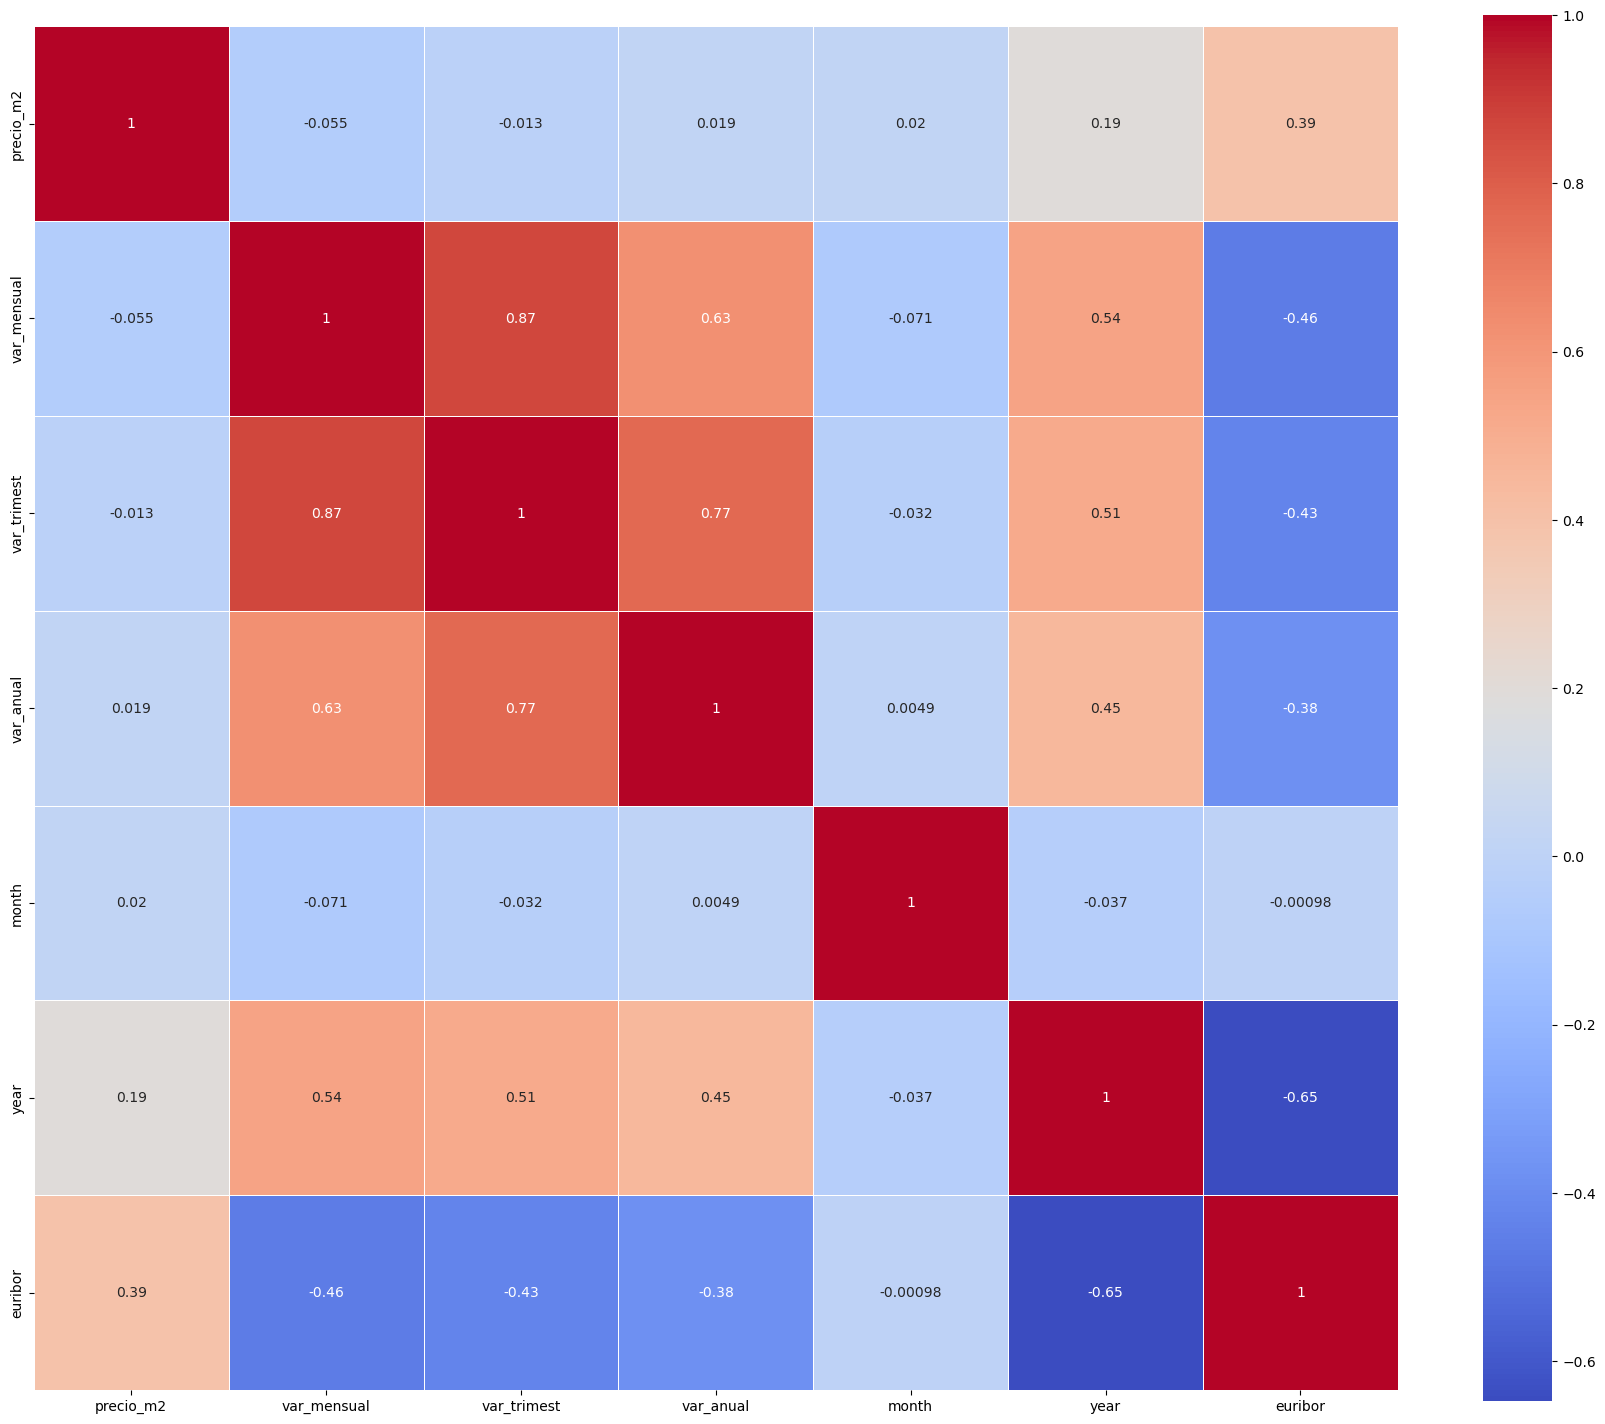

In [4]:
#Vamos a crear una matriz de correlación para ver la relación entre variables
#El precio del m2 tiene una correlación moderada con el valor del euribor, una correlación del 39%

corr = df_merged.corr()

f, ax = plt.subplots(figsize=(22,18))
sns.heatmap(corr, cmap="coolwarm", annot=True, square=True, linewidths=.5)

plt.show();

In [5]:
#Separamos las columnas que nos interesa explorar

x = df_merged["precio_m2"]
y = df_merged["euribor"]
z = df_merged["year"]

### Análisis exploratorio

In [6]:
#En el siguiente gráfico en 3d podemos observar las relaciones entre euribor y precio m2 en el eje temporal

# Datos de "x", "y" y "z"
x = df_merged["precio_m2"]
y = df_merged["euribor"]
z = df_merged['year']

# Crear la visualización 3D de dispersión con Plotly Express
fig = px.scatter_3d(x=x, y=y, z=z)

# Personalizar el tamaño del gráfico
fig.update_layout(autosize=False, width=1000, height=800)

# Mostrar el gráfico
fig.show()

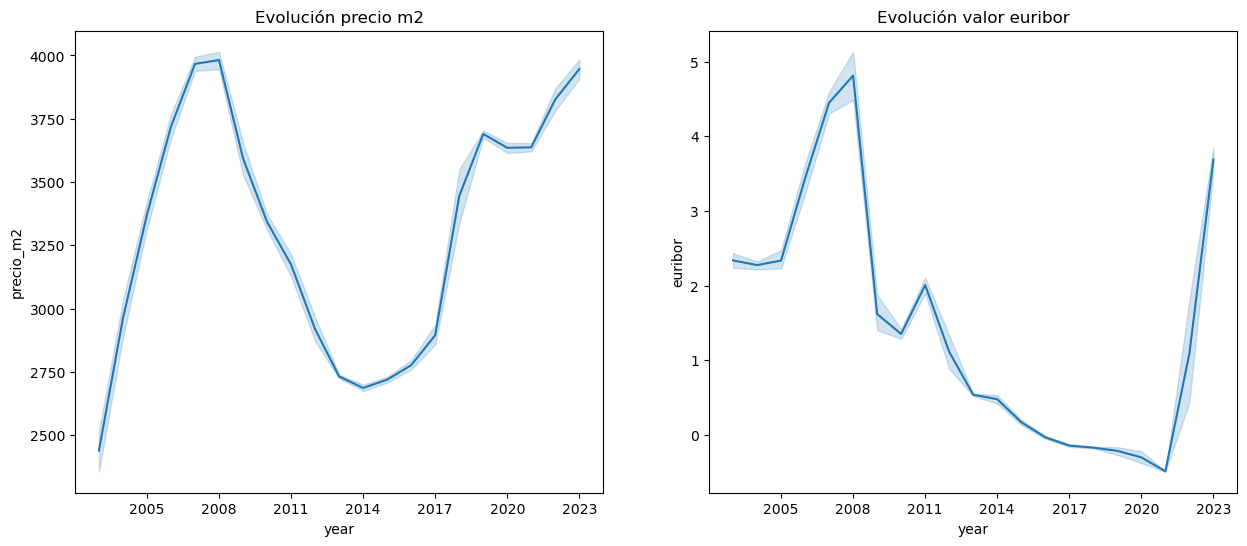

In [7]:
#Ahora vamos a sacar dos gráficos para precio y euribor para ver mejor su evolución temporal comparada

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.lineplot(x=z, y=x)
plt.title("Evolución precio m2")
plt.xticks(df_merged['year'][::36])


plt.subplot(1,2,2)
sns.lineplot(x=z, y=y)
plt.title("Evolución valor euribor")
plt.xticks(df_merged['year'][::36])

plt.show()

#Se aprecia un aumento del precio m2 en periodos en los que el euribor está alto y viceversa

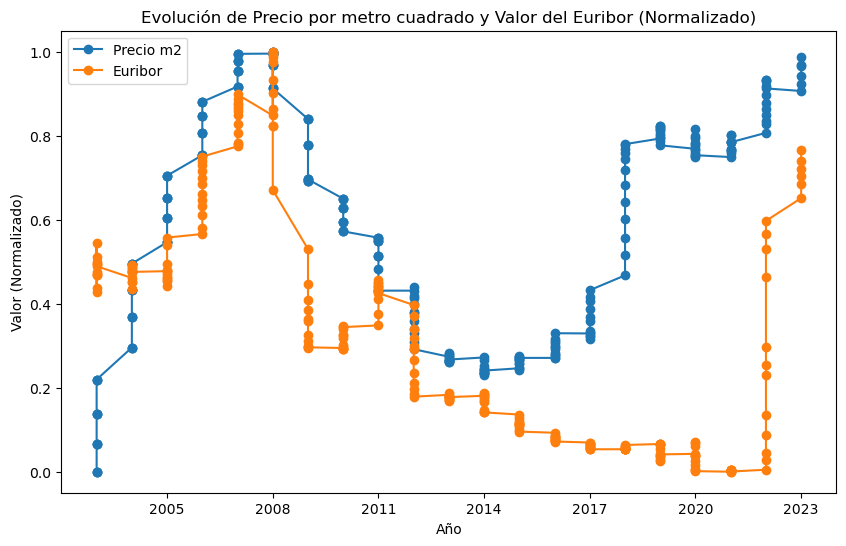

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler para normalizar las variables
scaler = MinMaxScaler()

# Normalizar las variables "precio_m2" y "euribor"
x_normalized = scaler.fit_transform(x.values.reshape(-1, 1))
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

# Crear el gráfico con ambas líneas normalizadas
plt.figure(figsize=(10, 6))
plt.plot(z, x_normalized, label='Precio m2', marker='o')
plt.plot(z, y_normalized, label='Euribor', marker='o')

# Configurar título y etiquetas
plt.title('Evolución de Precio por metro cuadrado y Valor del Euribor (Normalizado)')
plt.xlabel('Año')
plt.ylabel('Valor (Normalizado)')
plt.xticks(df_merged['year'][::36])
plt.legend()

# Mostrar el gráfico
plt.show()

In [9]:
df_merged

precio_m2  var_mensual  var_trimest  var_anual distrito  month  year  \
0         4015          0.9          2.0        5.1   madrid      6  2023   
1         3979          0.1          2.0        4.9   madrid      5  2023   
2         3977          1.1          2.8        5.6   madrid      4  2023   
3         3935          0.9          1.4        5.2   madrid      3  2023   
4         3900          0.8          0.4        4.5   madrid      2  2023   
..         ...          ...          ...        ...      ...    ...   ...   
241       2368          0.0          0.0        0.0   madrid      5  2003   
242       2368          0.0          0.0        0.0   madrid      4  2003   
243       2251          0.0          0.0        0.0   madrid      3  2003   
244       2251          0.0          0.0        0.0   madrid      2  2003   
245       2251          0.0          0.0        0.0   madrid      1  2003   

     euribor  
0     4.0073  
1     3.8618  
2     3.7437  
3     3.6466  
4     3.5336  
..       ...  
241   2.2521  
242   2.4470  
243   2.4112  
244   2.5036  
245   2.7045  

[246 rows x 8 columns]

Correlación entre el Euribor y el precio de la viviende en el rango de 2014 a 2021, rango en el que se observa la mayor discrepancia entre ambos.

In [10]:
df_filtered_14_21 = df_merged[(df_merged['year'] >= 2014) & (df_merged['year'] <= 2021)]

# Calcular la correlación entre el Euribor y el precio de venta para el período filtrado
correlation = df_filtered_14_21['precio_m2'].corr(df_filtered_14_21['euribor'])

print("Correlación entre el Euribor y el precio de venta (2014-2022):", correlation)

Correlación entre el Euribor y el precio de venta (2014-2022): -0.7678985197700028


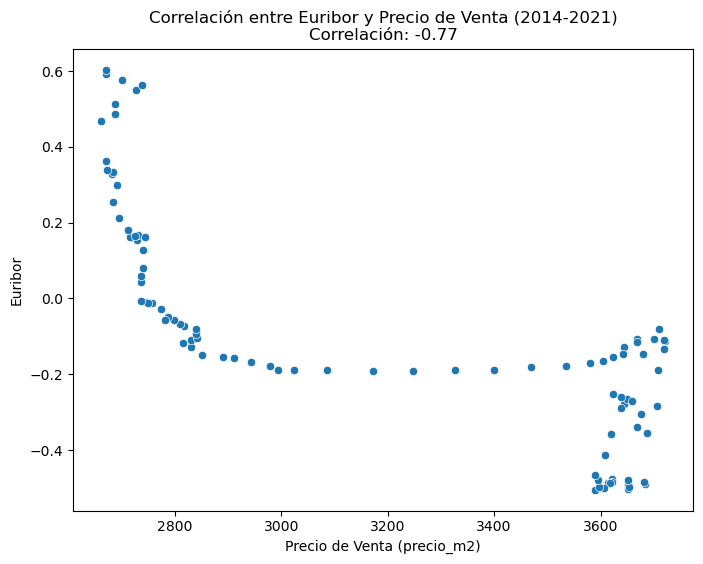

In [11]:
correlation = df_filtered_14_21['precio_m2'].corr(df_filtered_14_21['euribor'])

# Crear el gráfico de correlación utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered_14_21, x='precio_m2', y='euribor')
plt.title(f"Correlación entre Euribor y Precio de Venta (2014-2021)\nCorrelación: {correlation:.2f}")
plt.xlabel('Precio de Venta (precio_m2)')
plt.ylabel('Euribor')
plt.show()

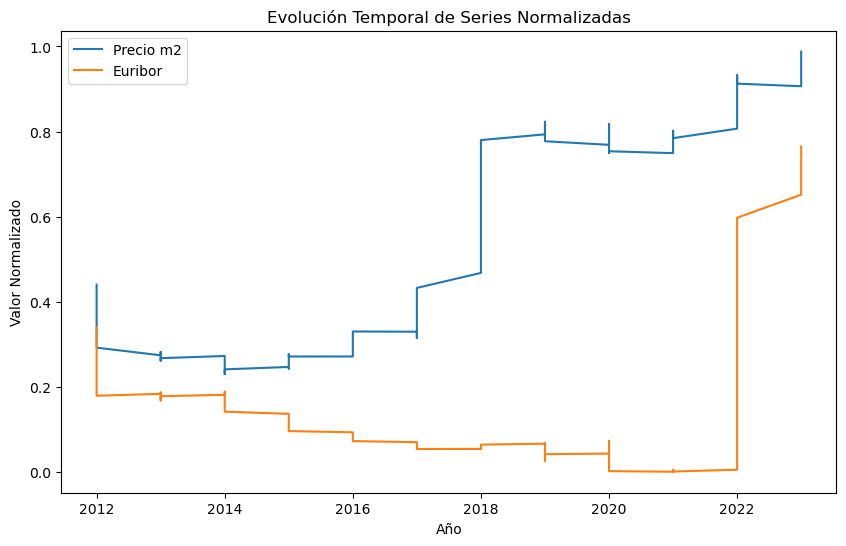

In [12]:
#Vamos a normalizar precio m2 y euribor para poder observarlos en la misma tabla con eje temporal

# Normalizar las series de valores
x_norm = (x - x.min()) / (x.max() - x.min())
y_norm = (y - y.min()) / (y.max() - y.min())

# Crear un DataFrame con las series normalizadas y el índice de fechas
df_normalized = pd.DataFrame({
    'Año': df_ventas_filtrado['year'],
    'Precio m2': x_norm,
    'Euribor': y_norm
})

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_normalized['Año'], df_normalized['Precio m2'], label='Precio m2')
plt.plot(df_normalized['Año'], df_normalized['Euribor'], label='Euribor')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Valor Normalizado')
plt.title('Evolución Temporal de Series Normalizadas')
plt.legend()

# Mostrar el gráfico
plt.show()

## Correlación seguridad y Calidad de Vida 

### Datos

In [13]:
df = pd.read_csv('demograficos_16_22.csv') 

df

date  year distrito      paro    cdv  seguridad   zverde
0    01/01/16  2016   madrid  197753.0  66.40      65.70  6029.87
1    01/01/17  2017   madrid  182379.0  69.50      66.35  6219.20
2    01/01/18  2018   madrid  167871.0  69.50      68.50  6021.40
3    01/01/19  2019   madrid  167188.0  71.30      68.10  5823.60
4    01/01/20  2020   madrid  192241.0  71.65      68.10  6031.44
..        ...   ...      ...       ...    ...        ...      ...
149  01/01/18  2018  barajas    1744.0  79.00      74.45   272.84
150  01/01/19  2019  barajas    1894.0  80.90      74.60   266.70
151  01/01/20  2020  barajas    2213.0  79.45      74.60   304.30
152  01/01/21  2021  barajas    2532.0  78.00      74.60   304.30
153  01/01/22  2022  barajas    1771.0  77.32      81.50   304.30

[154 rows x 7 columns]

In [14]:
# Obtener todos los valores únicos de la columna 'distrito'
valores_distrito = df['distrito'].unique()

# Mostrar la lista de valores únicos de la columna 'distrito'
print(valores_distrito)

['madrid' 'centro' 'arganzuela' 'retiro' 'salamanca' 'chamartin' 'tetuan'
 'chamberi' 'fuencarral' 'moncloa' 'latina' 'carabanchel' 'usera'
 'puente_vallecas' 'moratalaz' 'ciudad_lineal' 'hortaleza' 'villaverde'
 'villa_vallecas' 'vicalvaro' 'san_blas' 'barajas']


### Análisis exploratorio

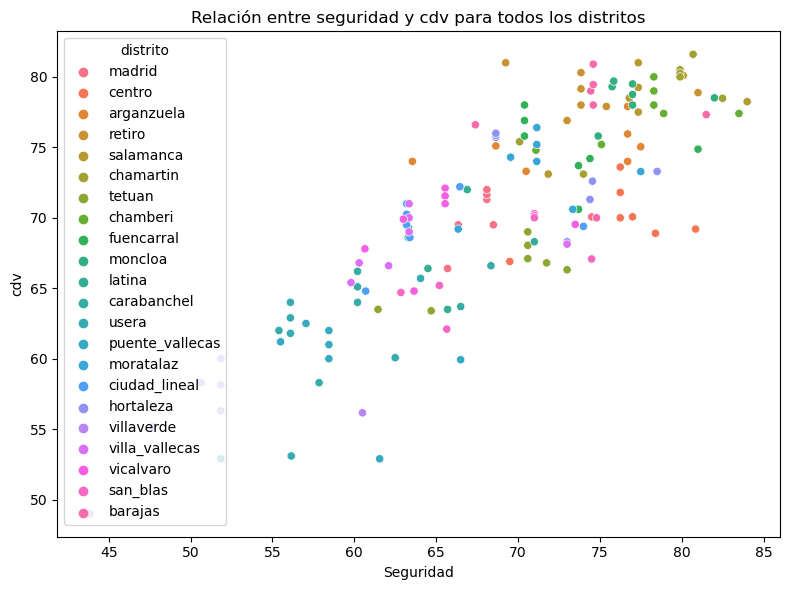

In [15]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='seguridad', y='cdv', data=df, hue='distrito')
plt.xlabel('Seguridad')
plt.ylabel('cdv')
plt.title('Relación entre seguridad y cdv para todos los distritos')
plt.tight_layout()
plt.show()

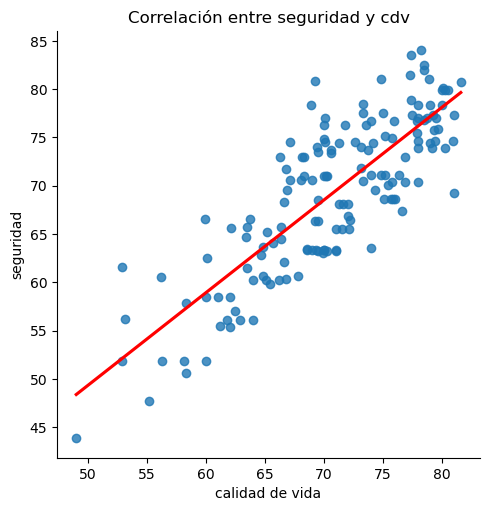

In [16]:
# Crear un scatter plot con una línea de regresión
sns.lmplot(x='cdv', y='seguridad', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Correlación entre seguridad y cdv')
plt.xlabel('calidad de vida')
plt.ylabel('seguridad')
plt.show()

In [17]:
# Calcular la correlación entre "seguridad" y "cdv"
correlation = df['seguridad'].corr(df['cdv'])
print(f"Correlación entre seguridad y cdv: {correlation}")

Correlación entre seguridad y cdv: 0.8238110458461134


## Demograficos 

In [18]:
from sklearn.preprocessing import MinMaxScaler

### Datos

In [19]:
data_demograficos = '/Users/marioalvarogutierrez/Documents/Data Analytics/Capstone/Transformación/Tablas finales/demograficos_16_22.csv'

df_demograficos = pd.read_csv(data_demograficos)

df_demograficos

date  year distrito      paro    cdv  seguridad   zverde
0    01/01/16  2016   madrid  197753.0  66.40      65.70  6029.87
1    01/01/17  2017   madrid  182379.0  69.50      66.35  6219.20
2    01/01/18  2018   madrid  167871.0  69.50      68.50  6021.40
3    01/01/19  2019   madrid  167188.0  71.30      68.10  5823.60
4    01/01/20  2020   madrid  192241.0  71.65      68.10  6031.44
..        ...   ...      ...       ...    ...        ...      ...
149  01/01/18  2018  barajas    1744.0  79.00      74.45   272.84
150  01/01/19  2019  barajas    1894.0  80.90      74.60   266.70
151  01/01/20  2020  barajas    2213.0  79.45      74.60   304.30
152  01/01/21  2021  barajas    2532.0  78.00      74.60   304.30
153  01/01/22  2022  barajas    1771.0  77.32      81.50   304.30

[154 rows x 7 columns]

### Análisis exploratorio

Evolución de cada variable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


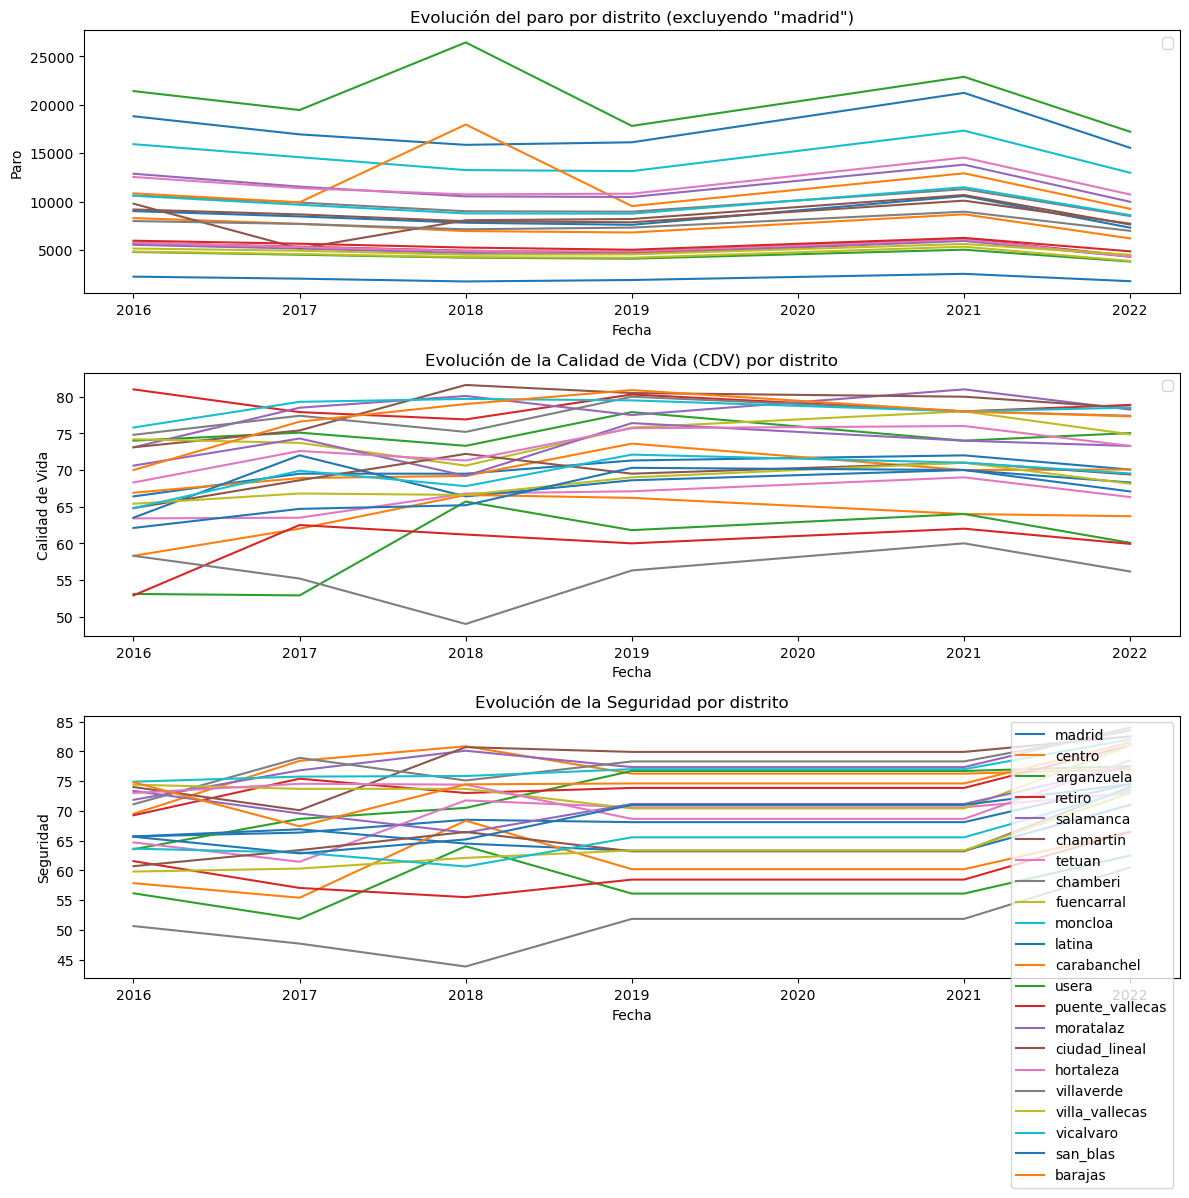

In [20]:
# Configurar tamaño de la figura
plt.figure(figsize=(12, 12))

# Gráfica para el paro (excluyendo el distrito "madrid")
plt.subplot(3, 1, 1)
for distrito in df_demograficos['distrito'].unique():
    if distrito != 'madrid':
        df_distrito = df_demograficos[df_demograficos['distrito'] == distrito]
        plt.plot(df_distrito['year'], df_distrito['paro'])
plt.title('Evolución del paro por distrito (excluyendo "madrid")')
plt.xlabel('Fecha')
plt.ylabel('Paro')
plt.legend()

# Gráfica para la calidad de vida (CDV)
plt.subplot(3, 1, 2)
for distrito in df_demograficos['distrito'].unique():
    df_distrito = df_demograficos[df_demograficos['distrito'] == distrito]
    plt.plot(df_distrito['year'], df_distrito['cdv'])
plt.title('Evolución de la Calidad de Vida (CDV) por distrito')
plt.xlabel('Fecha')
plt.ylabel('Calidad de Vida')
plt.legend()

# Gráfica para la seguridad
plt.subplot(3, 1, 3)
for distrito in df_demograficos['distrito'].unique():
    df_distrito = df_demograficos[df_demograficos['distrito'] == distrito]
    plt.plot(df_distrito['year'], df_distrito['seguridad'], label=distrito)
plt.title('Evolución de la Seguridad por distrito')
plt.xlabel('Fecha')
plt.ylabel('Seguridad')
plt.legend()

# Ajustar el espacio entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Graficas por distrito

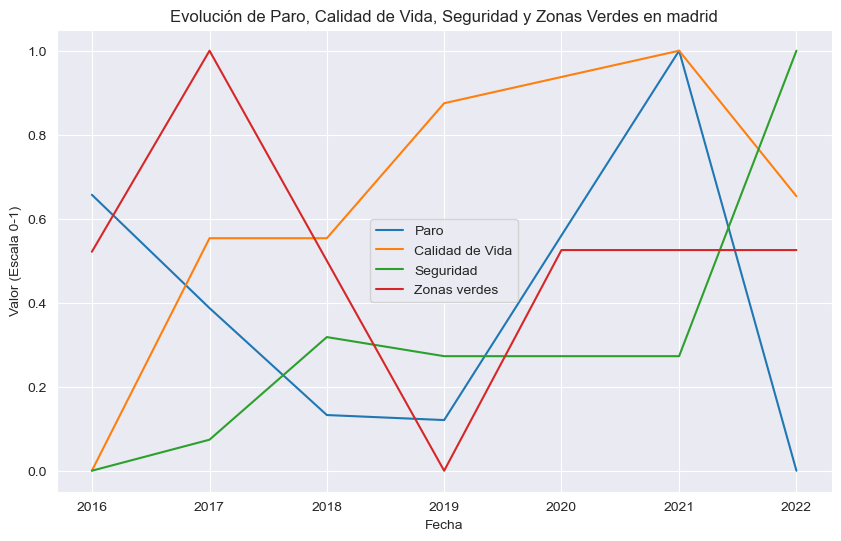

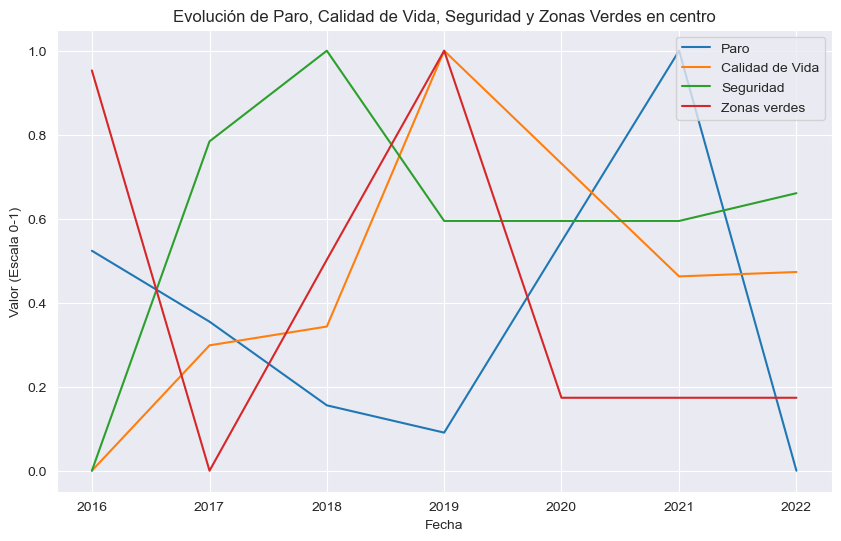

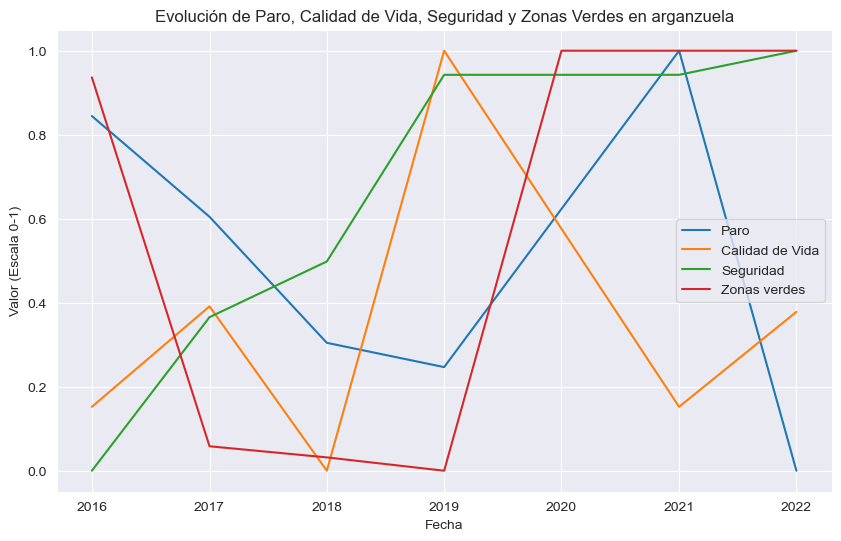

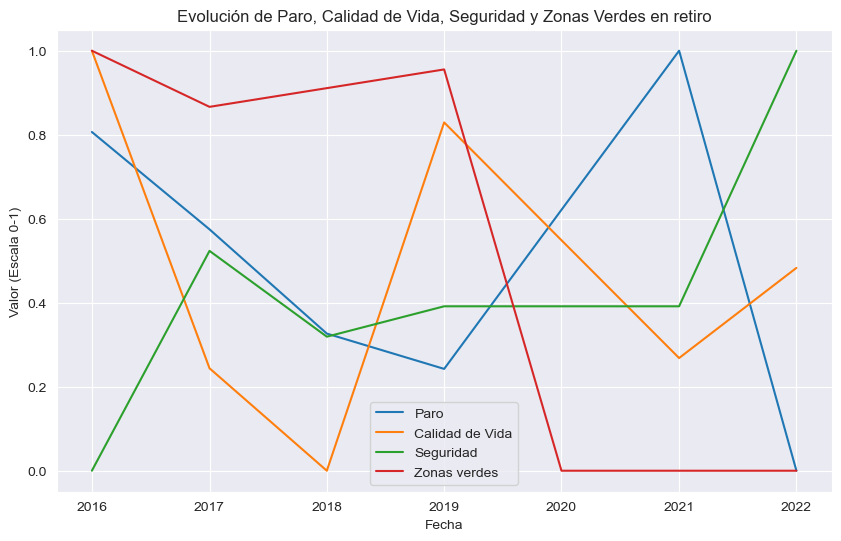

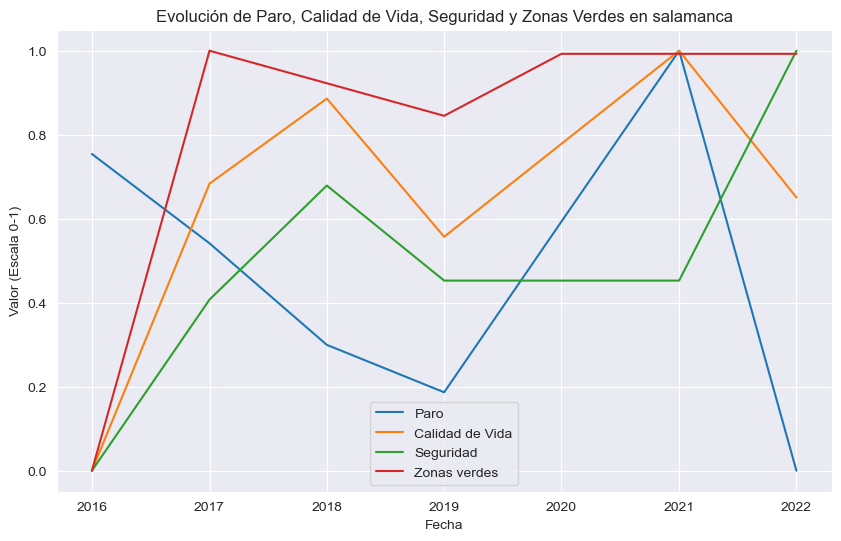

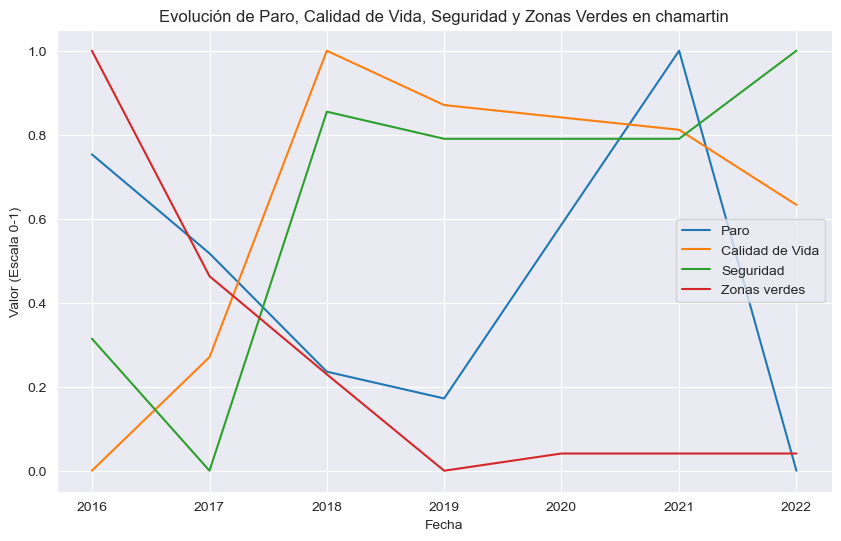

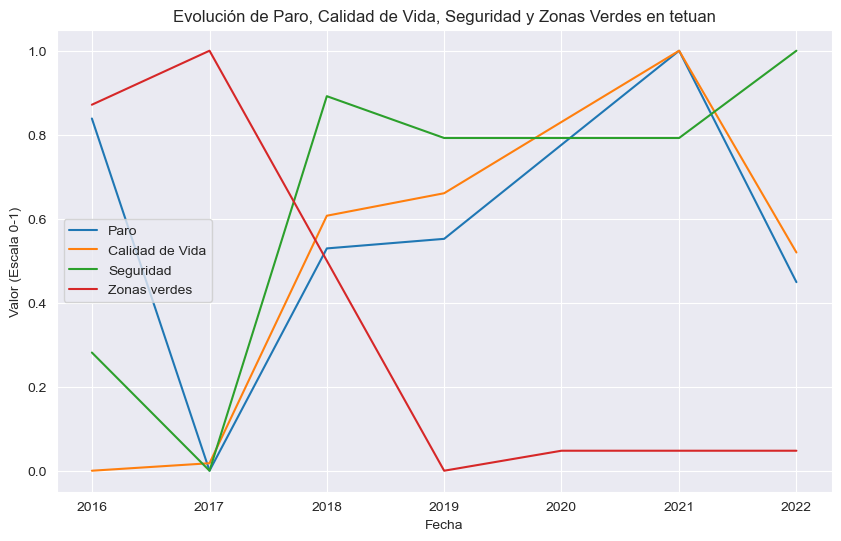

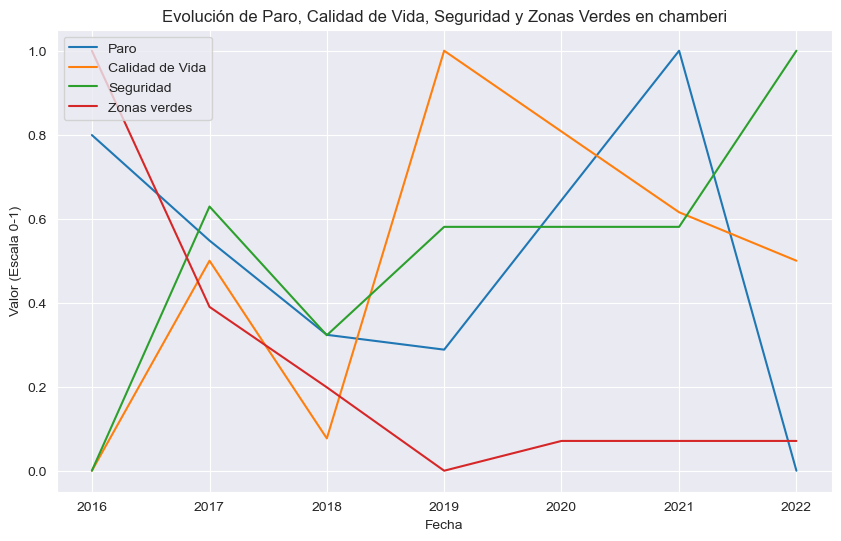

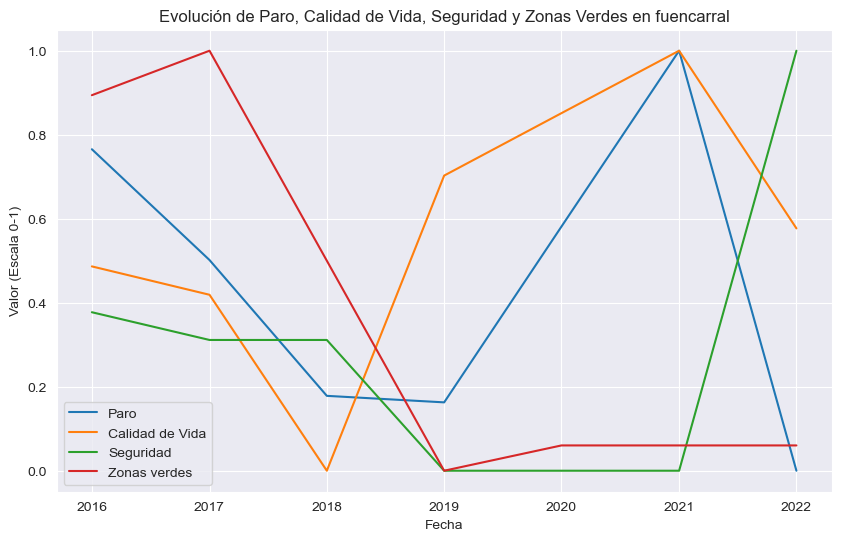

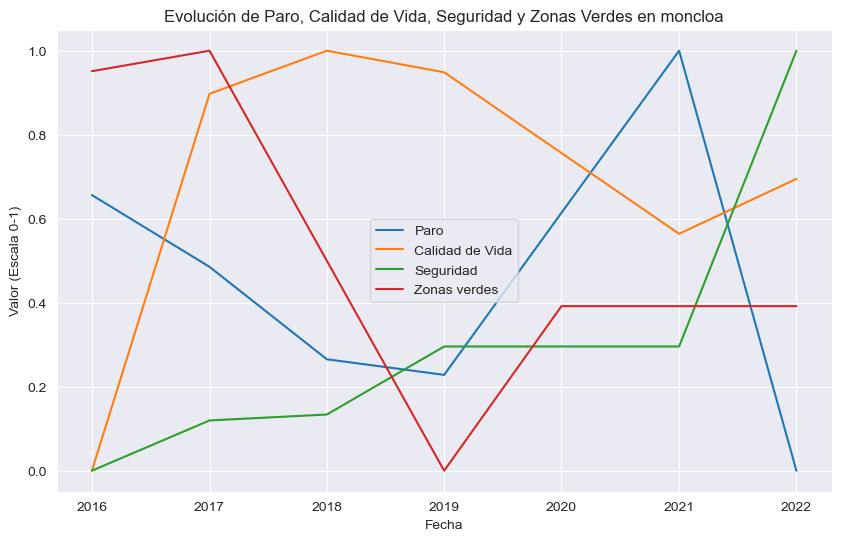

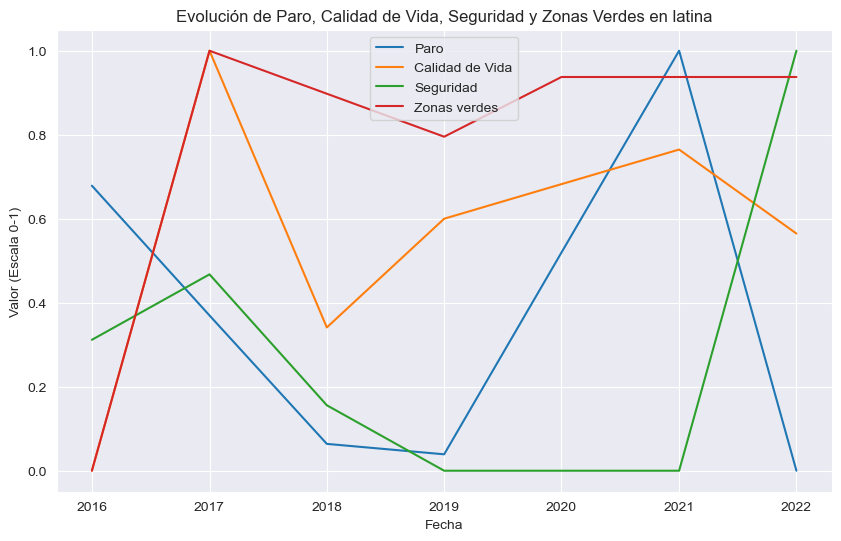

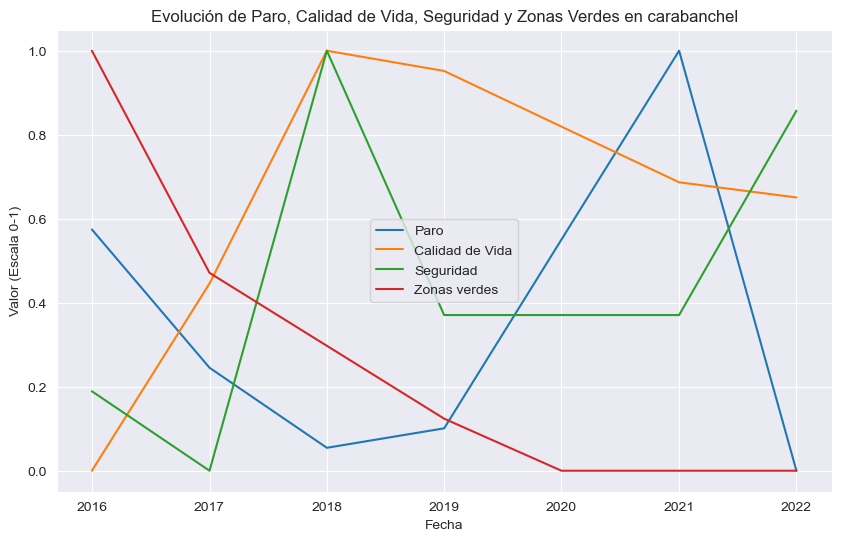

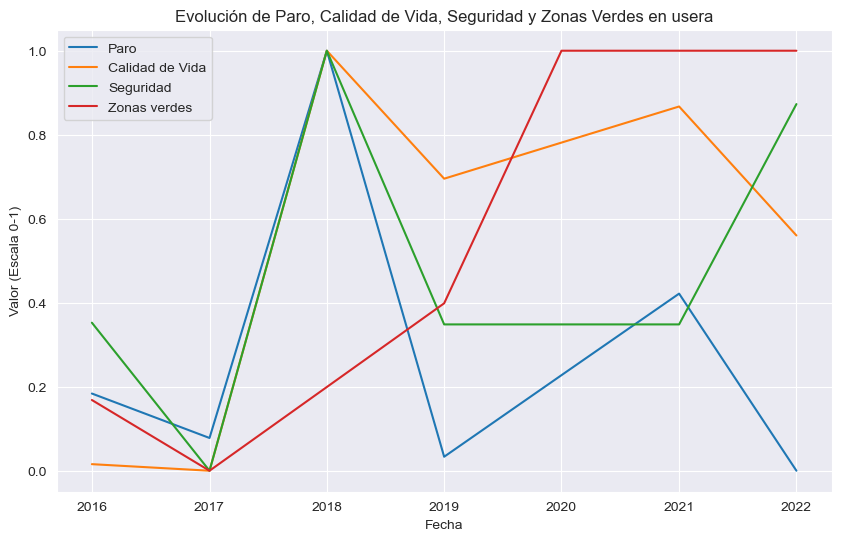

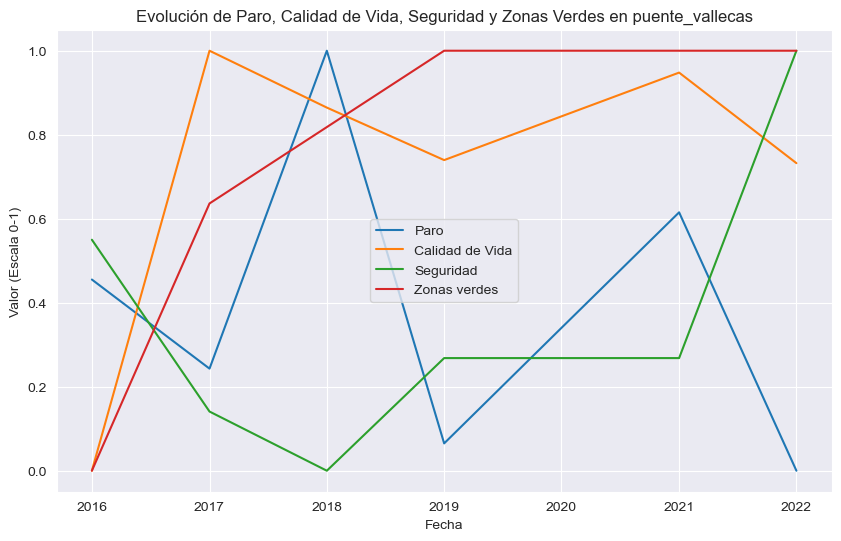

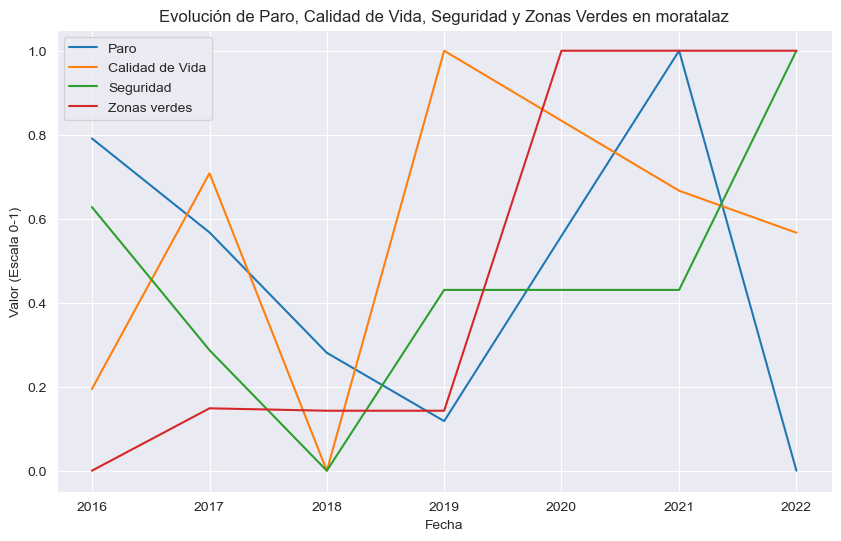

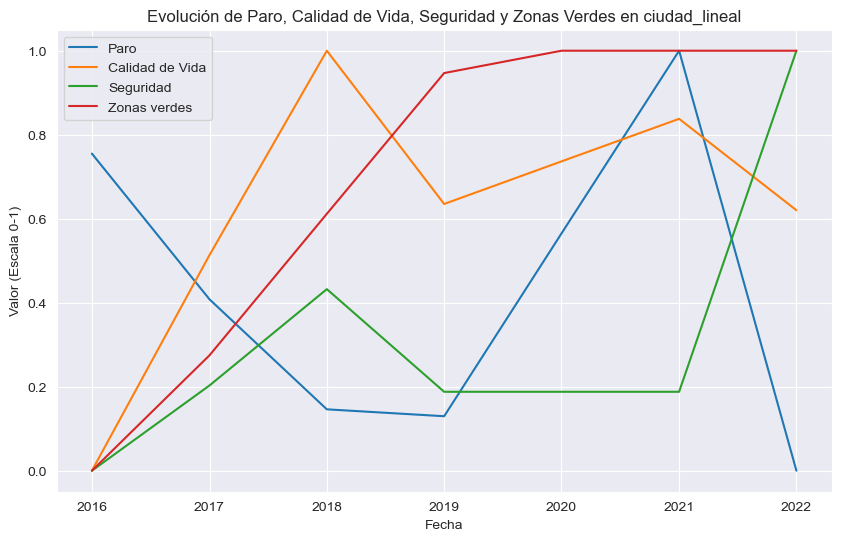

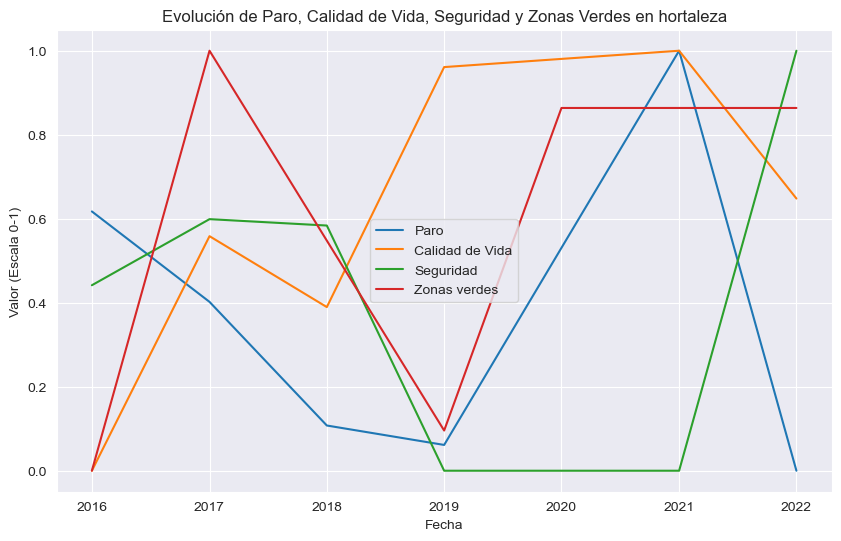

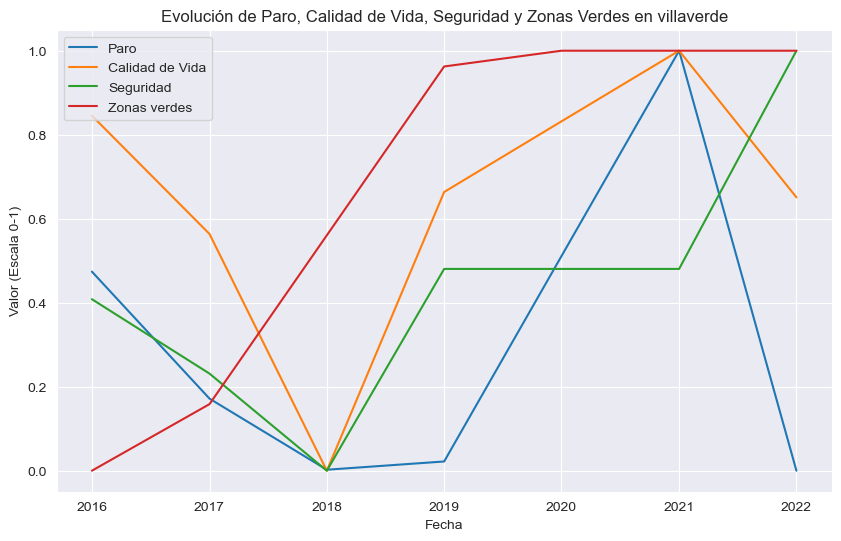

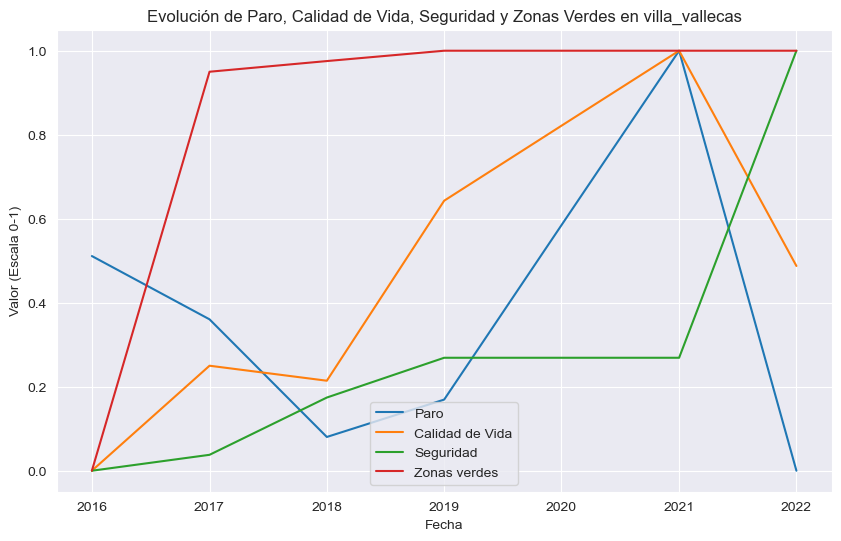

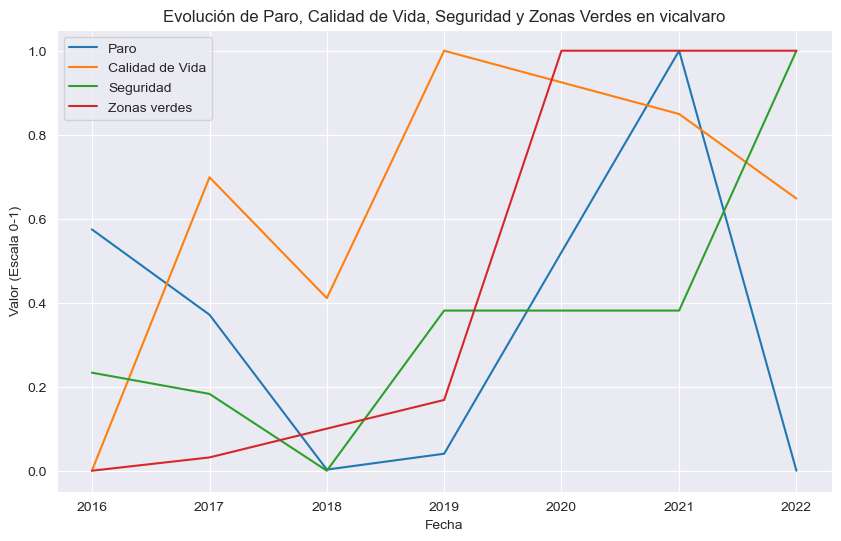

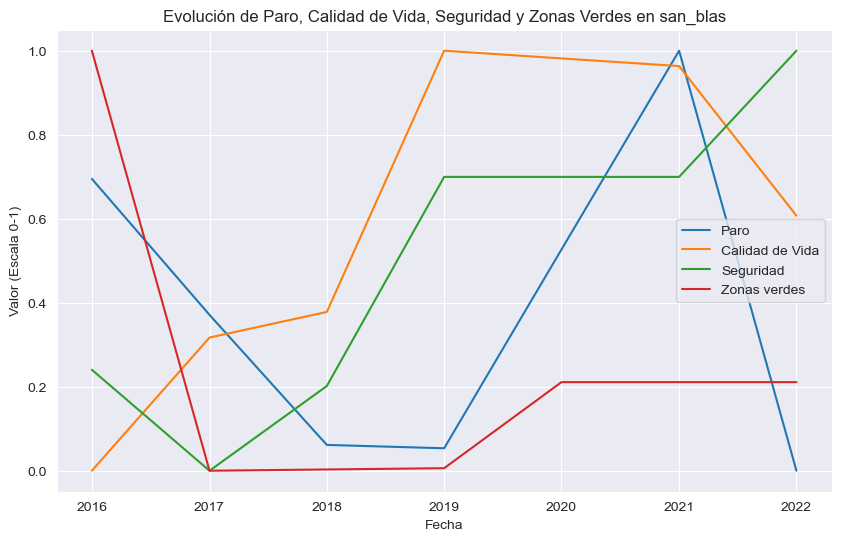

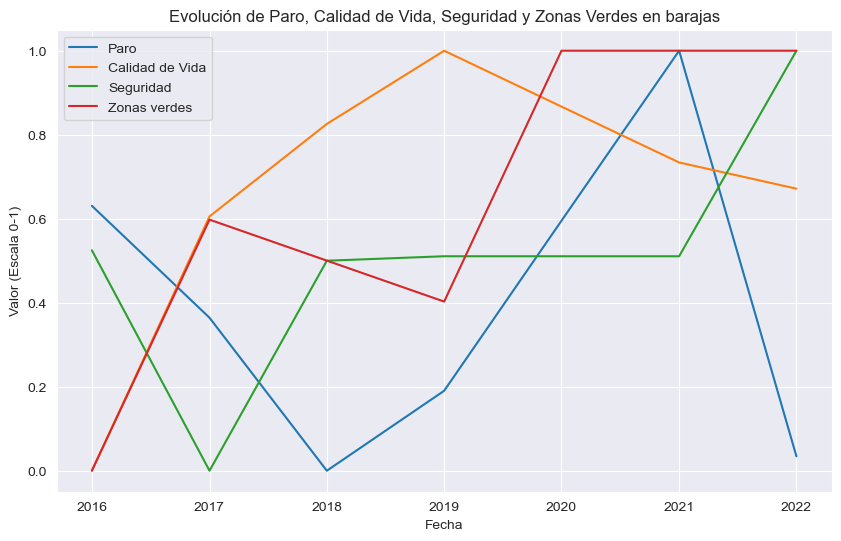

In [21]:
# Convertir la columna "fecha" al formato datetime
df_demograficos['date'] = pd.to_datetime(df_demograficos['date'], format='%d/%m/%y')

# Obtener la lista de distritos únicos
distritos = df_demograficos['distrito'].unique()

# Configurar estilo de gráficos
sns.set_style("darkgrid")

# Crear un objeto MinMaxScaler solo para las columnas numéricas
scaler = MinMaxScaler()

# Iterar sobre los distritos y crear una gráfica escalada para cada uno
for distrito in distritos:
    # Filtrar los datos por el distrito actual
    df_distrito = df_demograficos[df_demograficos['distrito'] == distrito]
    
    # Separar las columnas numéricas de las categóricas
    columnas_numericas = df_distrito.select_dtypes(include=[float]).columns
    
    # Escalar las variables numéricas (excepto la columna 'fecha')
    df_distrito[columnas_numericas] = scaler.fit_transform(df_distrito[columnas_numericas])
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='paro', data=df_distrito, label='Paro')
    sns.lineplot(x='date', y='cdv', data=df_distrito, label='Calidad de Vida')
    sns.lineplot(x='date', y='seguridad', data=df_distrito, label='Seguridad')
    sns.lineplot(x='date', y='zverde', data=df_distrito, label='Zonas verdes')

    
    # Configurar título y etiquetas
    plt.title('Evolución de Paro, Calidad de Vida, Seguridad y Zonas Verdes en {}'.format(distrito))
    plt.xlabel('Fecha')
    plt.ylabel('Valor (Escala 0-1)')
    
    # Mostrar leyenda
    plt.legend()
    
    # Mostrar la gráfica para el distrito actual
    plt.show()

## Analisis por distritos de la evolucion del precio del alquiler y compra de la vivienda

### Datos

In [22]:
df_alquiler = pd.read_csv('alquiler_12_23.csv')
df_compra = pd.read_csv('ventas_01_23.csv')
df_alquiler_compra = pd.merge(df_alquiler, df_compra, on= ('year', 'month'), suffixes=('_alquiler', '_compra'))

In [23]:
df_alquiler_compra

date_alquiler  precio_m2_alquiler  var_mensual_alquiler  \
0        2023-06-01                16.8                   1.2   
1        2023-06-01                16.8                   1.2   
2        2023-06-01                16.8                   1.2   
3        2023-06-01                16.8                   1.2   
4        2023-06-01                16.8                   1.2   
...             ...                 ...                   ...   
65819    2012-03-01                 8.7                   0.3   
65820    2012-03-01                 8.7                   0.3   
65821    2012-03-01                 8.7                   0.3   
65822    2012-03-01                 8.7                   0.3   
65823    2012-03-01                 8.7                   0.3   

       var_trimest_alquiler  var_anual_alquiler distrito_alquiler  month  \
0                       3.7                10.2            madrid      6   
1                       3.7                10.2            madrid      6   
2                       3.7                10.2            madrid      6   
3                       3.7                10.2            madrid      6   
4                       3.7                10.2            madrid      6   
...                     ...                 ...               ...    ...   
65819                   0.3                 5.9        villaverde      3   
65820                   0.3                 5.9        villaverde      3   
65821                   0.3                 5.9        villaverde      3   
65822                   0.3                 5.9        villaverde      3   
65823                   0.3                 5.9        villaverde      3   

       year date_compra  precio_m2_compra  var_mensual_compra  \
0      2023  2023-06-01              4015                 0.9   
1      2023  2023-06-01              4392                 0.1   
2      2023  2023-06-01              3507                 2.8   
3      2023  2023-06-01              2457                 0.4   
4      2023  2023-06-01              5368                 0.2   
...     ...         ...               ...                 ...   
65819  2012  2012-03-01              3094                 1.2   
65820  2012  2012-03-01              2053                 0.2   
65821  2012  2012-03-01              2351                 0.3   
65822  2012  2012-03-01              2444                 0.4   
65823  2012  2012-03-01              1884                 0.5   

       var_trimest_compra  var_anual_compra distrito_compra  
0                     2.0               5.1          madrid  
1                     0.8               2.8      arganzuela  
2                     3.2               7.5         barajas  
3                     3.5               8.2     carabanchel  
4                     2.3               5.4          centro  
...                   ...               ...             ...  
65819                 2.0               9.0          tetuan  
65820                 2.5              12.0           usera  
65821                 0.2               7.6       vicalvaro  
65822                 0.8               5.2  villa_vallecas  
65823                 0.8              10.2      villaverde  

[65824 rows x 14 columns]

### Análisis exploratorio

Evolución del precio del alquiler y venta por distrito 

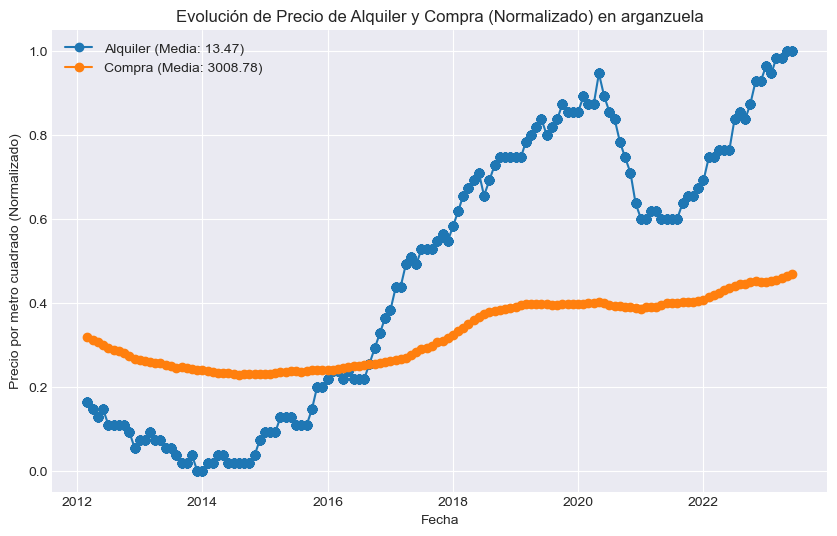

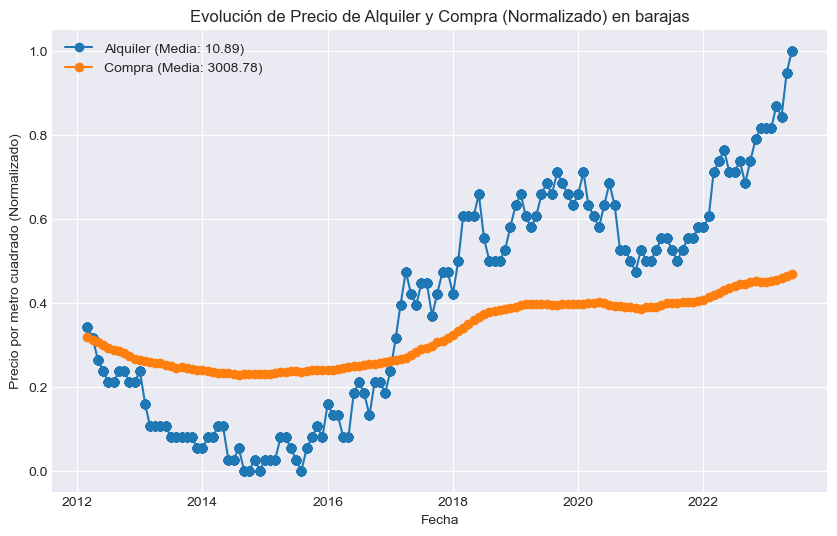

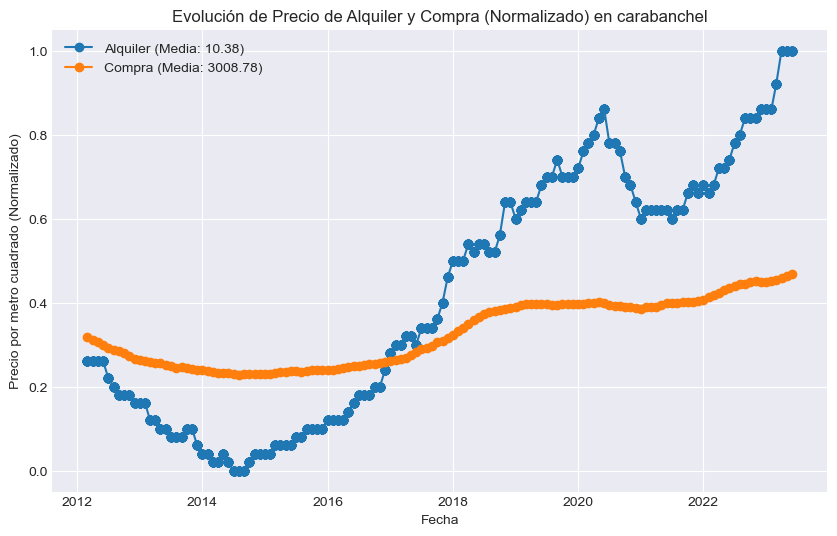

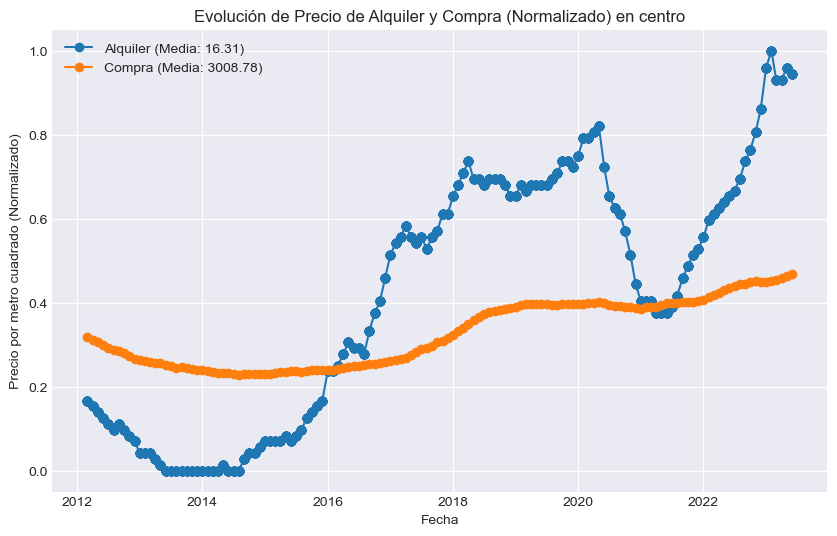

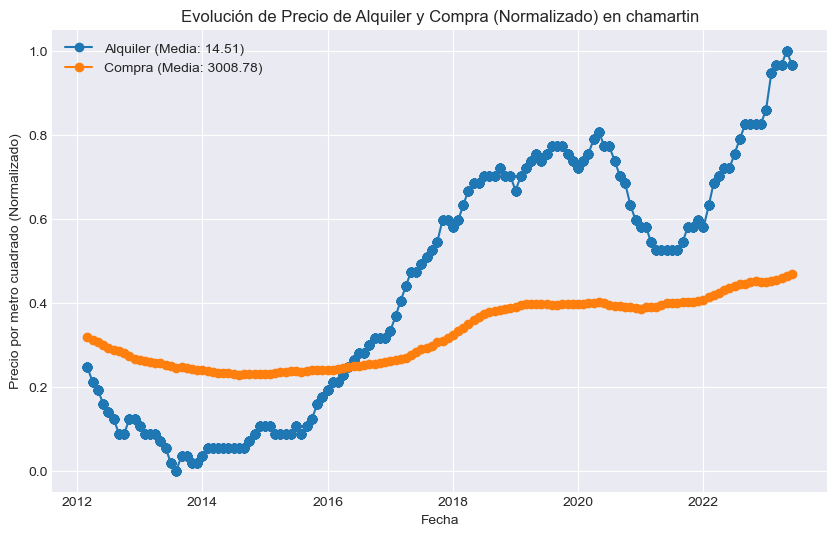

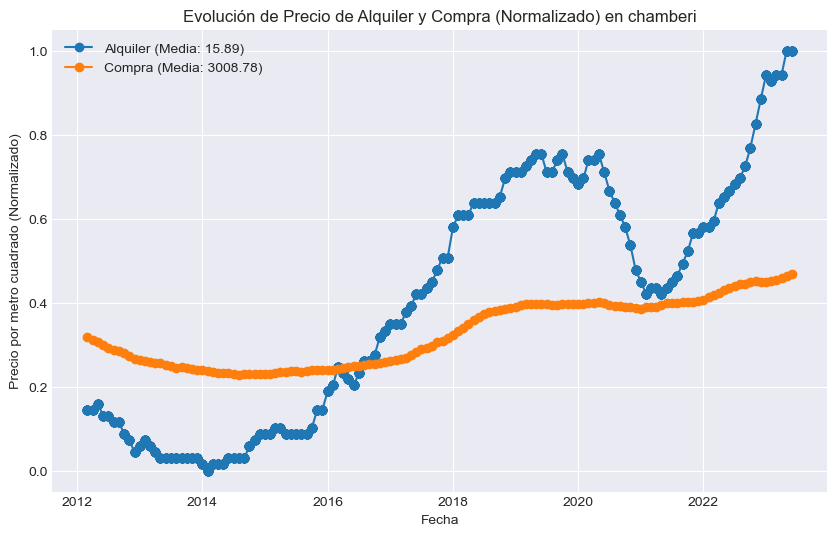

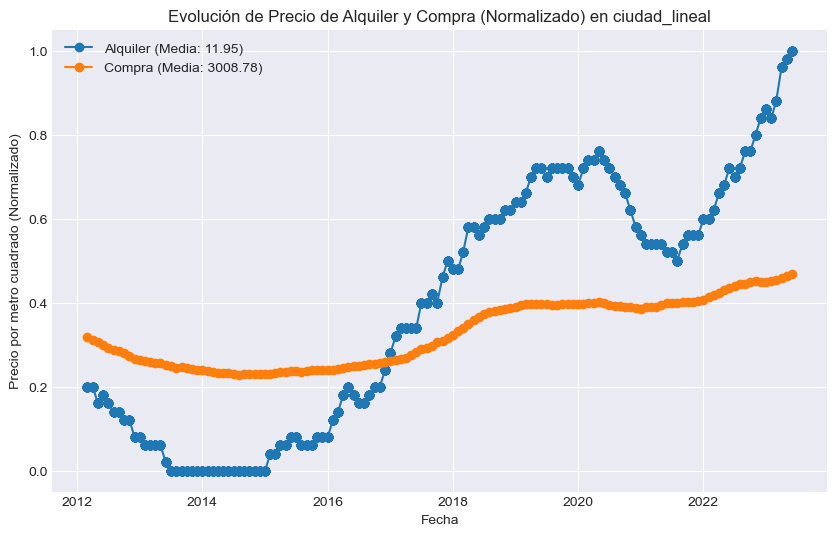

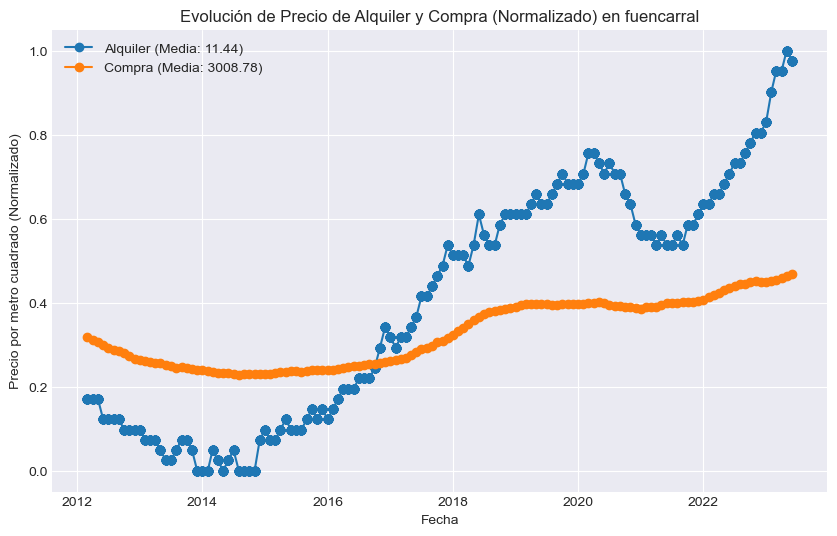

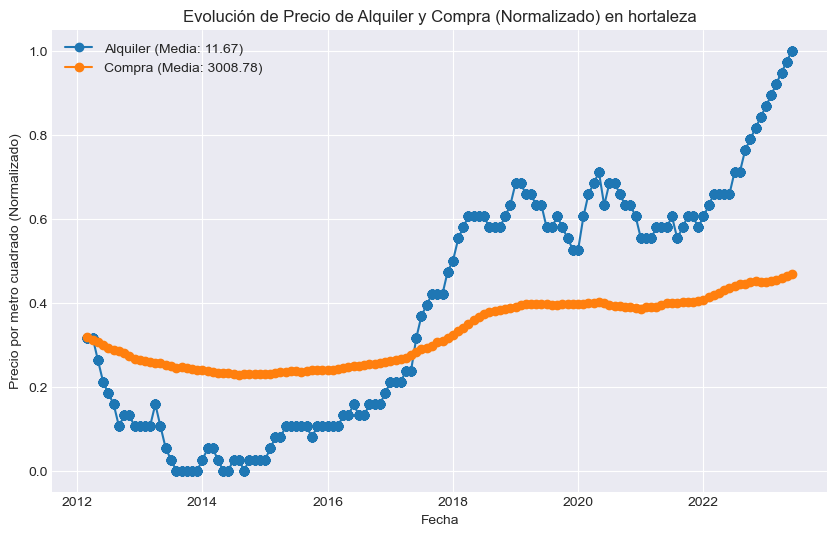

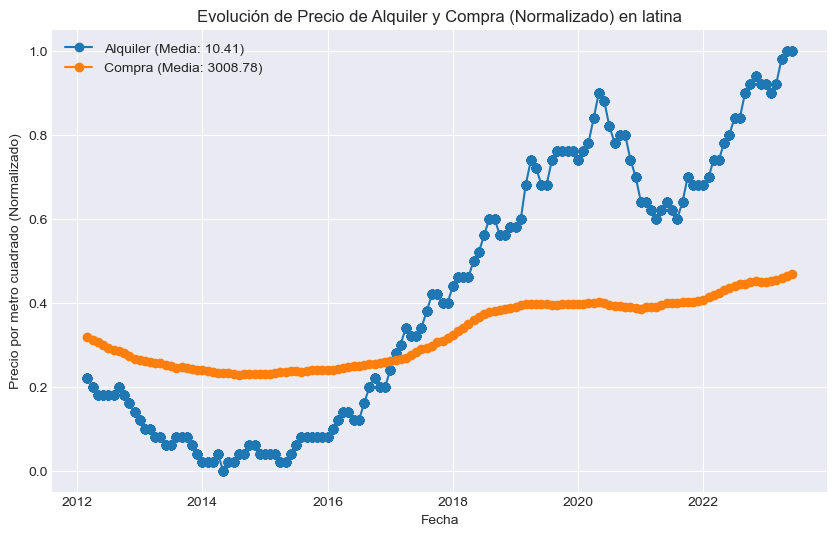

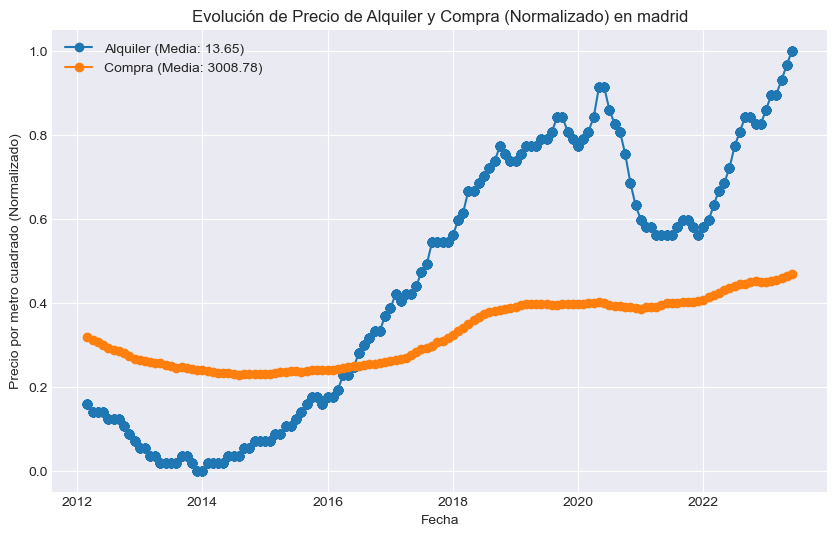

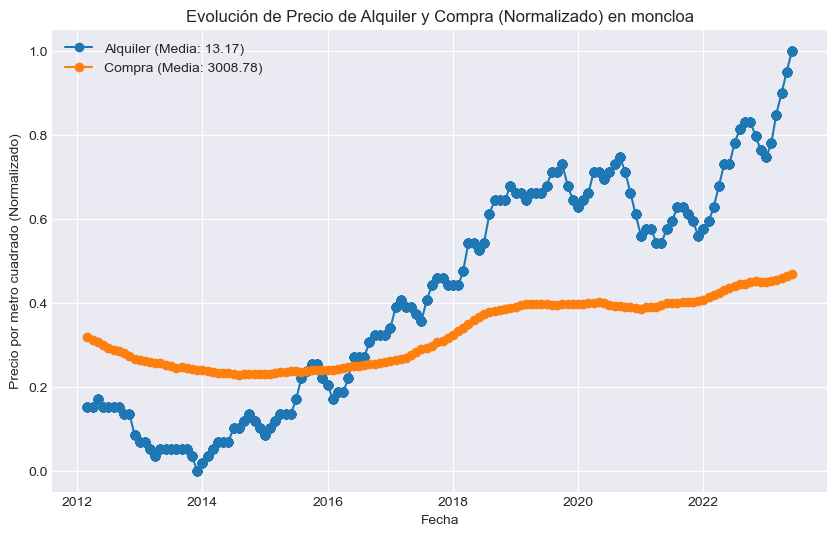

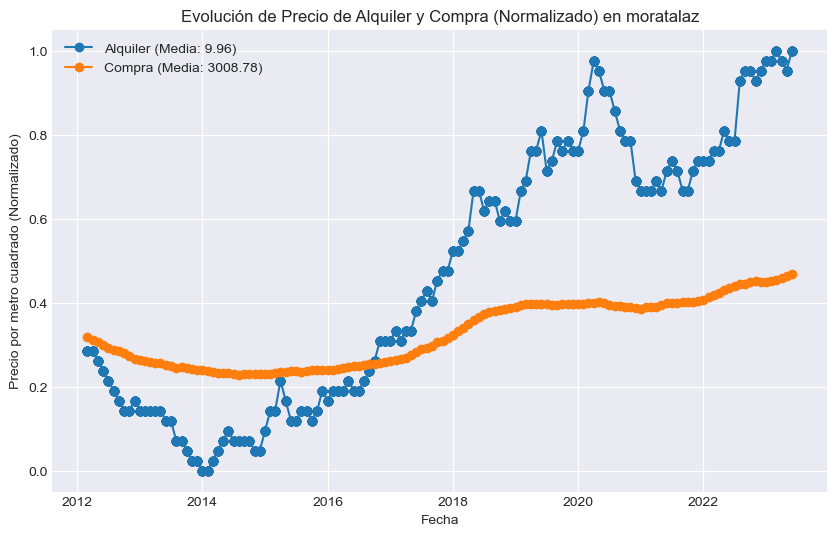

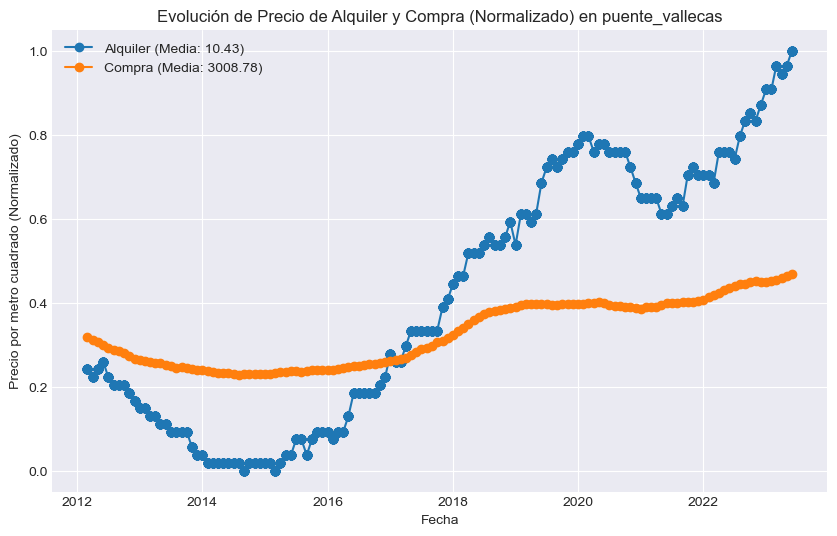

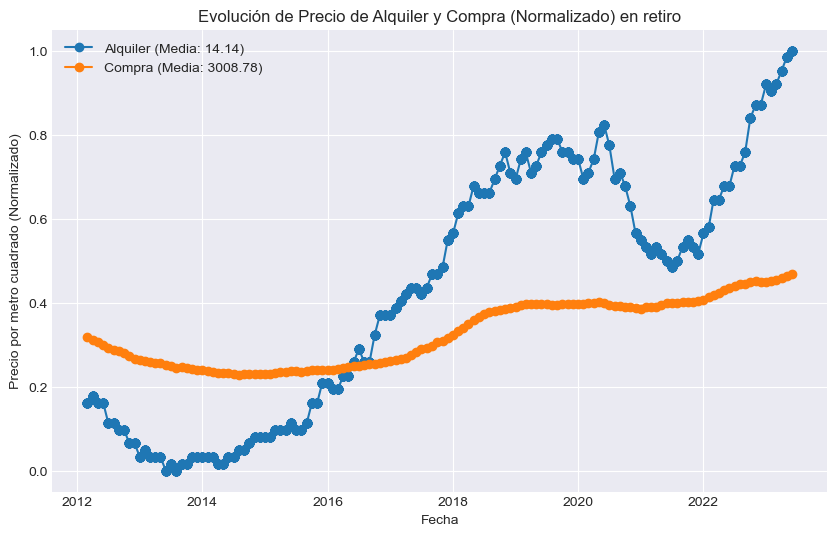

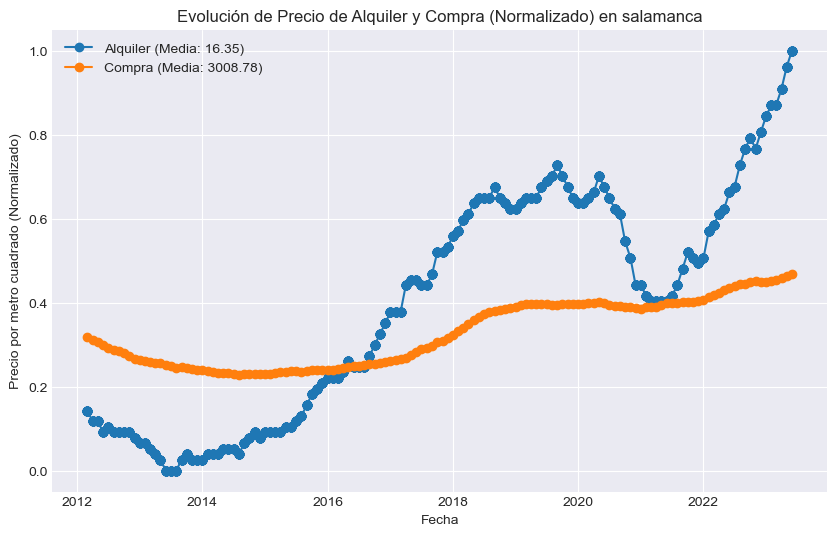

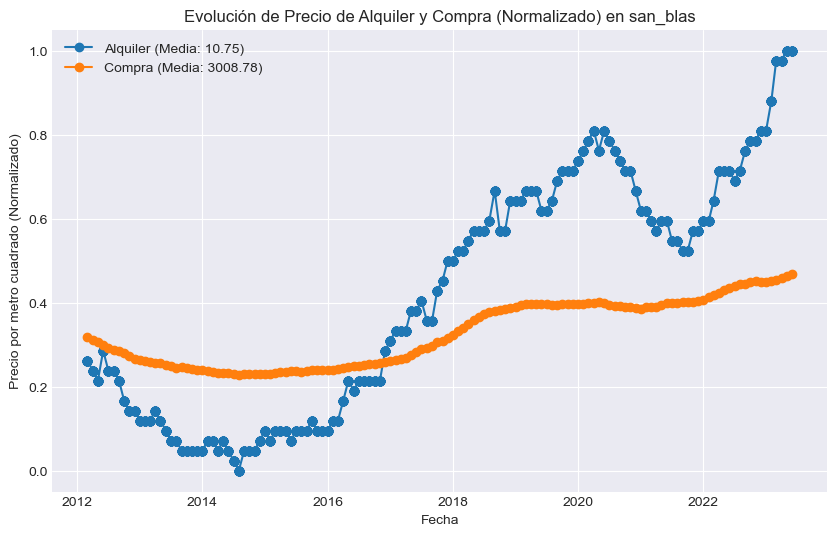

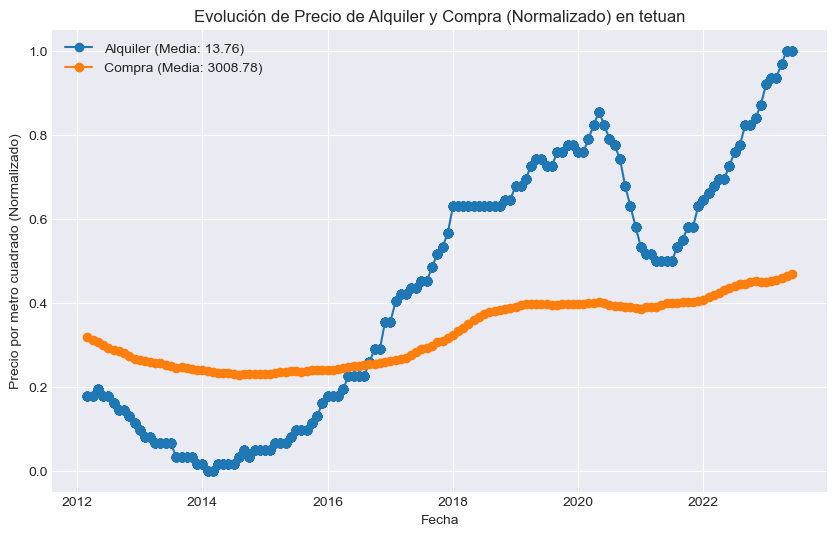

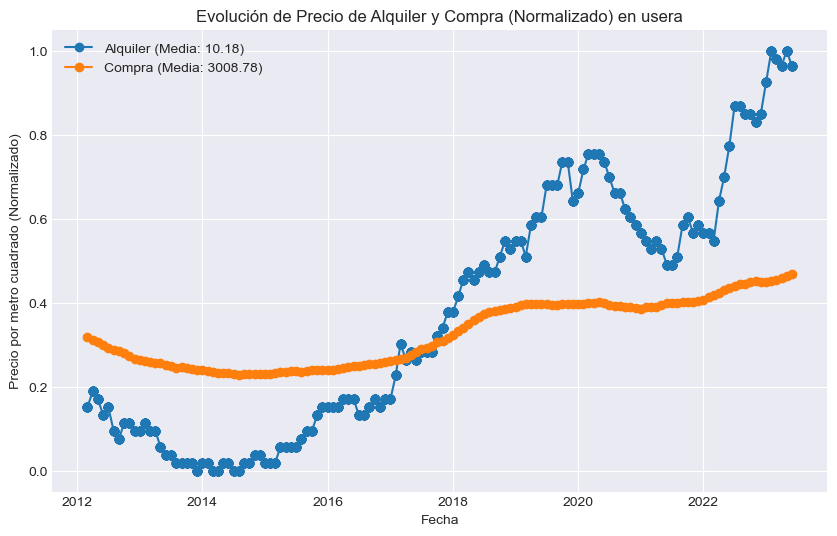

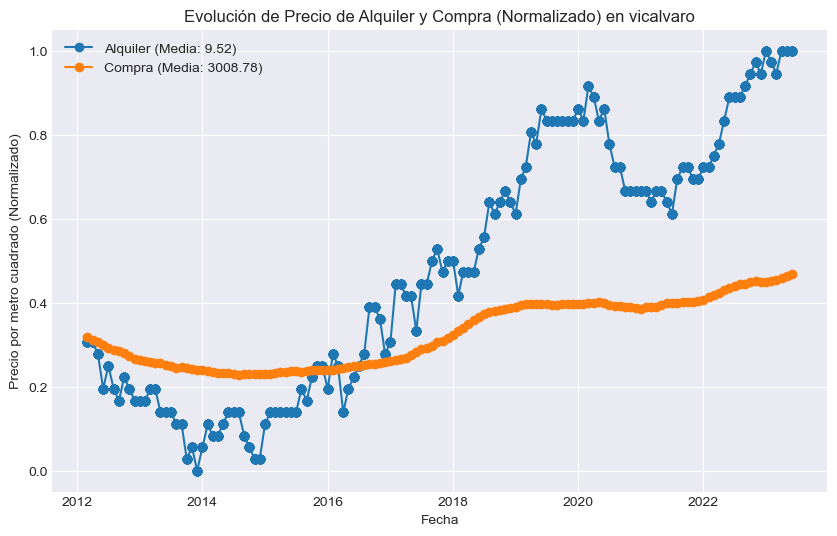

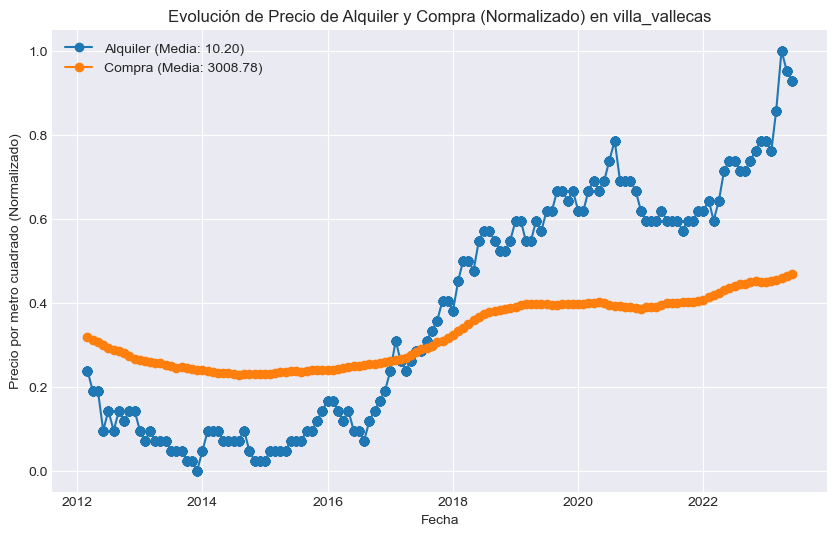

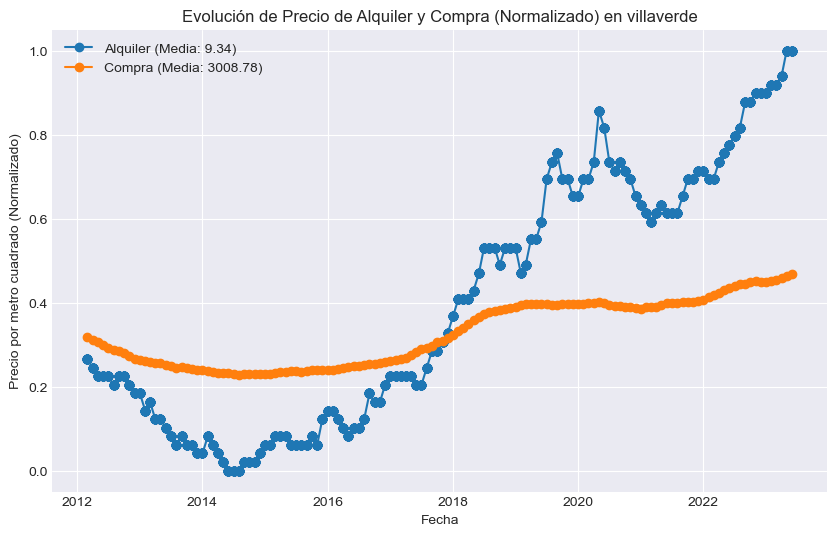

In [24]:
# Convertir la columna de fecha al formato datetime
df_alquiler_compra['date_alquiler'] = pd.to_datetime(df_alquiler_compra['date_alquiler'])
df_alquiler_compra['date_compra'] = pd.to_datetime(df_alquiler_compra['date_compra'])

# Calcular la media del precio de alquiler y venta para cada distrito
df_grouped = df_alquiler_compra.groupby('distrito_alquiler').mean()

# Obtener la lista de distritos únicos
distritos = df_grouped.index

# Configurar estilo de gráficos
plt.style.use('seaborn-darkgrid')

# Crear una gráfica para cada distrito
for distrito in distritos:
    # Filtrar los datos para el distrito actual
    df_distrito = df_alquiler_compra[df_alquiler_compra['distrito_alquiler'] == distrito]
    
    # Calcular la media del precio de alquiler y venta para el distrito
    media_alquiler = df_grouped.loc[distrito, 'precio_m2_alquiler']
    media_venta = df_grouped.loc[distrito, 'precio_m2_compra']
    
    # Normalizar las variables de precio por metro cuadrado para alquiler y venta
    scaler = MinMaxScaler()
    df_distrito['precio_m2_alquiler_normalized'] = scaler.fit_transform(df_distrito[['precio_m2_alquiler']])
    df_distrito['precio_m2_compra_normalized'] = scaler.fit_transform(df_distrito[['precio_m2_compra']])
    
    # Calcular la media del precio de compra para cada fecha
    df_compra_media = df_distrito.pivot_table(index='date_compra', values='precio_m2_compra_normalized', aggfunc='mean')
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df_distrito['date_alquiler'], df_distrito['precio_m2_alquiler_normalized'], label='Alquiler', marker='o')
    plt.plot(df_compra_media.index, df_compra_media['precio_m2_compra_normalized'], label='Compra', marker='o')
    
    # Configurar título y etiquetas
    plt.title(f'Evolución de Precio de Alquiler y Compra (Normalizado) en {distrito}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio por metro cuadrado (Normalizado)')
    
    # Mostrar la media del precio de alquiler y venta en la leyenda
    plt.legend(['Alquiler (Media: {:.2f})'.format(media_alquiler), 'Compra (Media: {:.2f})'.format(media_venta)])
    
    # Mostrar la gráfica para el distrito actual
    plt.show()


Distritos con mayor diferencia entre el precio de alquiler y el precio de venta por m2 en 2022 

In [25]:
# Filtrar los datos para incluir solo el año 2022
df_2022 = df_alquiler_compra[df_alquiler_compra['year'] == 2022]

# Calcular la media del precio de alquiler y venta para cada distrito en el año 2022
df_grouped_2022 = df_2022.groupby('distrito_alquiler').mean()

# Normalizar las variables de precio por metro cuadrado para alquiler y venta en el año 2022
scaler = MinMaxScaler()
df_2022['precio_m2_alquiler_normalized'] = scaler.fit_transform(df_2022[['precio_m2_alquiler']])
df_2022['precio_m2_compra_normalized'] = scaler.fit_transform(df_2022[['precio_m2_compra']])

# Calcular la diferencia entre el precio de venta y el precio de alquiler para cada distrito en el año 2022 (normalizado)
df_2022['diferencia_venta_alquiler'] = df_2022['precio_m2_alquiler_normalized'] - df_2022['precio_m2_compra_normalized']

# Obtener el top 5 de distritos con la mayor diferencia en el año 2022
top_5_distritos_2022 = pd.DataFrame(df_2022.groupby('distrito_alquiler')['diferencia_venta_alquiler'].mean().nlargest(5))

print("Top 5 distritos con la mayor diferencia entre precio de venta y precio de alquiler en el año 2022 (normalizada):")
top_5_distritos_2022

Top 5 distritos con la mayor diferencia entre precio de venta y precio de alquiler en el año 2022 (normalizada):


diferencia_venta_alquiler
distrito_alquiler                           
salamanca                           0.494815
centro                              0.465511
chamberi                            0.426134
chamartin                           0.244815
retiro                              0.213679